In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb

In [2]:
pd.set_option('display.max_column', None)
df = pd.read_csv('../data/clean_data/data_v1.csv', index_col=0)
df.head()

,age,job_industry_recode,school_enroll_lastweek,employment,fam_size,full_time_work,full_part_school,highest_education,hs_col_unenrolled,weekly_earnings,hourly_work_yn,hours_worked,labor_force_recode,marital_status,main_job_industry_recode,sex,union_contract_avail,union_member_yn,reason_unemployed,weeks_unemployed,ft_pt_unem,age_recode_gt15,federal_gross_income_adj,need_childcare,hh_childcare_val,hh_childcare,health_insurance_ly,company_offer_insurance,poverty_ratio,family_earn_ly,fam_id,fam_med_costs,fam_outofpocket_med_costs,fam_otc_med_costs,fam_rent_val,fips,state,state.1
1,67,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,Some College But No Degree,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Never married,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,0,Niu,-1,Niu,Coverage for all of year,NIU,BELOW POVERTY LEVEL,0,1,0,0,0,0,ME,4,23
2,74,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Divorced,"Not in universe, or children",Male,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,70 to 74 years,9,Niu,-1,Niu,Coverage for all of year,NIU,BELOW POVERTY LEVEL,0,1,0,60,60,0,ME,4,23
3,66,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Widowed,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,0,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
4,68,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Widowed,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,2400,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
5,52,"Not in universe, or children",No,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Marr-civ sp present,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,50 to 54 years,47828,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,42000,1,50,1370,0,0,ME,3,23


In [3]:
education_map = {"Children":"Less than highschool",
                "11th Grade" : "Less than highschool",
                "10th Grade": "Less than highschool",
                "9th Grade" : "Less than highschool",
                "7th and 8th grade" : "Less than highschool",
                "12th Grade No Diploma" : "Less than highschool",
                "5th Or 6th Grade" : "Less than highschool",
                "1st,2nd,3rd,or 4th grade": "Less than highschool",
                "Less Than 1st Grade": "Less than highschool",
                "Bachelor's degree (BA,AB,BS)" : "Undergrad",
                "Master's degree (MA,MS,MENG,MED,MSW,MBA)": "Masters or Higher",
                "Doctorate degree (PHD,EDD)" : "Masters or Higher",
                "Professional school degree (MD,DDS,DVM,L" : "Masters or Higher",
                "Some College But No Degree" : "Some College",
                "Assc degree-academic program" : "Some College",
                "Assc degree-occupation/vocation" : "Some College",
                "High school graduate-high school diploma" : "highschool"
}
sex_map = {
            "Male":0,
            "Female":1
}
poverty_ratio_map = {
    'BELOW POVERTY LEVEL' : "Impoverished" ,
    '150 AND ABOVE THE POVERTY LEVEL' : "Not Impoverished",
    '100 - 124 PERCENT OF THE POVERTY LEVEL' : "Impoverished",
    '125 - 149 PERCENT OF THE POVERTY LEVEL' : "Impoverished",
    'NOT IN POVERTY UNIVERSE' : "NIU"
}


In [4]:
df = df.query("employment < 2")
df = df.loc[df['federal_gross_income_adj']>=0]
df = df[df['poverty_ratio'] != 'NOT IN POVERTY UNIVERSE']

In [5]:
df.highest_education = df.highest_education.map(education_map)
df.sex = df.sex.map(sex_map)
df.poverty_ratio = df.poverty_ratio.map(poverty_ratio_map)

In [6]:
numeric_columns = ['federal_gross_income_adj', 
                   'fam_size', 
                   'age', 
                   'fam_med_costs', 
                   'weeks_unemployed', 
                   'hours_worked', 
                   'poverty_ratio', 
                   'highest_education', 
                   'sex', 
                   'employment'
] 
svm_data = df.loc[:,numeric_columns]

In [7]:
encoder = LabelEncoder()
svm_data['highest_education'] = encoder.fit_transform(svm_data['highest_education'])
svm_data['poverty_ratio'] = encoder.fit_transform(svm_data['poverty_ratio'])

In [8]:
from imblearn.under_sampling import RandomUnderSampler

In [9]:
X = svm_data.drop(columns = 'poverty_ratio')
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, svm_data['poverty_ratio'], train_size=0.7, test_size=0.3)
rus = RandomUnderSampler(random_state=1111)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [10]:
gradientboost = xgb.XGBClassifier()
gradientboost.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

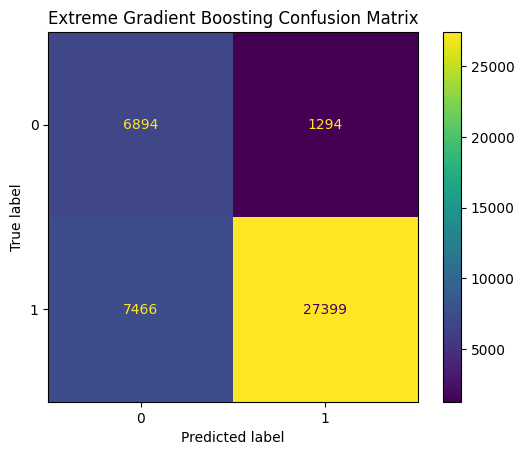

In [50]:
ConfusionMatrixDisplay.from_estimator(gradientboost, X_test, y_test)
plt.title("Extreme Gradient Boosting Confusion Matrix")
plt.savefig('../site_pages/plots/xgbConfusion.png')

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_true= y_test, y_pred = gradientboost.predict(X_test)))

              precision    recall  f1-score   support

           0       0.48      0.84      0.61      8188
           1       0.95      0.79      0.86     34865

    accuracy                           0.80     43053
   macro avg       0.72      0.81      0.74     43053
weighted avg       0.86      0.80      0.81     43053



In [49]:
report = classification_report(y_true= y_test, y_pred = gradientboost.predict(X_test), output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.480084,0.841964,0.611495,8188.00000
1,0.954902,0.785860,0.862173,34865.00000
accuracy,0.796530,0.796530,0.796530,0.79653
macro avg,0.717493,0.813912,0.736834,43053.00000
weighted avg,0.864599,0.796530,0.814498,43053.00000


In [13]:
gradientboost.feature_importances_

array([0.3046167 , 0.2692863 , 0.04270067, 0.14959922, 0.00397837,
       0.04010099, 0.04939932, 0.01934072, 0.12097777], dtype=float32)

In [14]:
X_columns = svm_data.drop(columns = 'poverty_ratio')
X_columns = X_columns.columns
X_train_df = pd.DataFrame(data = X_train, columns = X_columns)
X_train_df.head()

,federal_gross_income_adj,fam_size,age,fam_med_costs,weeks_unemployed,hours_worked,highest_education,sex,employment
0,-0.432729,0.288997,-1.443471,0.444415,-0.020846,-0.842463,-1.193642,-1.027126,-0.957664
1,-0.432729,0.288997,-1.358011,-0.405861,-0.020846,-0.842463,-1.193642,-1.027126,-0.957664
2,-0.432729,0.288997,0.949383,0.044285,-0.020846,-0.842463,0.742145,-1.027126,-0.957664
3,-0.219828,-1.968061,0.436629,-0.380852,-0.020846,-0.364905,0.742145,0.973591,1.044207
4,-0.432729,0.288997,1.248490,-0.255812,-0.020846,-0.842463,0.742145,-1.027126,-0.957664


In [15]:
pd.set_option("display.max_columns", 10)
df

,age,job_industry_recode,school_enroll_lastweek,employment,fam_size,...,fam_otc_med_costs,fam_rent_val,fips,state,state.1
1,67,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,...,0,0,ME,4,23
2,74,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,...,60,0,ME,4,23
3,66,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,...,0,0,ME,3,23
4,68,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,...,0,0,ME,3,23
5,52,"Not in universe, or children",No,0,1,...,0,0,ME,3,23
...,...,...,...,...,...,...,...,...,...,...,...
146129,17,"Not in universe, or children",Yes,0,1,...,200,0,HI,2,15
146130,15,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,...,200,0,HI,2,15
146131,59,Office and administrative support occupations,Not in univ. or children & Armed Forces,1,1,...,450,0,HI,2,15
146132,60,Business and financial operations occupations,Not in univ. or children & Armed Forces,1,1,...,450,0,HI,2,15


In [16]:
from xgboost import plot_tree
from sklearn import tree
import dtreeviz

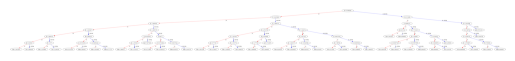

<Figure size 1200x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_tree(gradientboost)
plt.figure(figsize = (12,8))
plt.show()


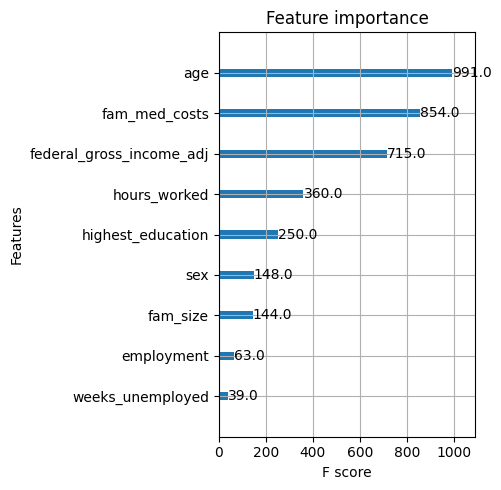

In [53]:
fig, ax = plt.subplots(figsize=(5, 5))
#gradientboost.get_booster().feature_names = X_columns
xgb.plot_importance(gradientboost, ax=ax)
y_lab = [X_columns[4], X_columns[8], X_columns[1], X_columns[7], X_columns[6], X_columns[5], X_columns[0], X_columns[3], X_columns[2]]
plt.yticks(range(len(y_lab)),labels = y_lab)
plt.tight_layout()
plt.savefig('../site_pages/plots/xgbFeatureImportance.png')
plt.show()

In [43]:
len(X_train_df)

38876